In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
file_path = '/content/test.ft.txt'  # Update this with the correct file path
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Process the data to extract labels and reviews
data = []
for line in lines:
    # Match the pattern: __label__ followed by a number and review text
    match = re.match(r"(__label__\d)\s(.+)", line.strip())
    if match:
        label = match.group(1)  # Extract the label
        review = match.group(2)  # Extract the review text
        data.append([label, review])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Label', 'Review'])
df = df[:150000]

# Display the DataFrame
print(df.head())


        Label                                             Review
0  __label__2  Great CD: My lovely Pat has one of the GREAT v...
1  __label__2  One of the best game music soundtracks - for a...
2  __label__1  Batteries died within a year ...: I bought thi...
3  __label__2  works fine, but Maha Energy is better: Check o...
4  __label__2  Great for the non-audiophile: Reviewed quite a...


In [4]:
df.size, df.shape

(191518, (95759, 2))

In [5]:
df[45644:45645]

,Label,Review
45644,__label__1,Doesn't help much. Waiting for Pill Pro.: I tr...


In [6]:
df.describe()

,Label,Review
count,95759,95759
unique,2,95759
top,__label__2,Great CD: My lovely Pat has one of the GREAT v...
freq,48509,1


In [7]:
df['Label']

,Label
0,__label__2
1,__label__2
2,__label__1
3,__label__2
4,__label__2
...,...
95754,__label__1
95755,__label__1
95756,__label__1
95757,__label__2


In [8]:
len(df[df["Label"] == '__label__2'])

48509

In [9]:
df["Label"] == '__label__2'

,Label
0,True
1,True
2,False
3,True
4,True
...,...
95754,False
95755,False
95756,False
95757,True


In [10]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == '__label__2' else 0)

In [11]:
df.head()

,Label,Review
0,1,Great CD: My lovely Pat has one of the GREAT v...
1,1,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...: I bought thi...
3,1,"works fine, but Maha Energy is better: Check o..."
4,1,Great for the non-audiophile: Reviewed quite a...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95759 entries, 0 to 95758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   95759 non-null  int64 
 1   Review  95759 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [13]:
df['Label'] = df['Label'].astype('int8')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95759 entries, 0 to 95758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   95759 non-null  int8  
 1   Review  95759 non-null  object
dtypes: int8(1), object(1)
memory usage: 841.8+ KB


# EDA : Data visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-43b6acf39426>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='pastel')


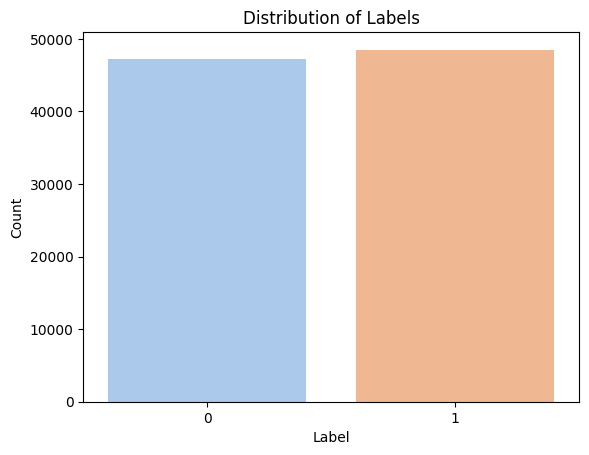

In [16]:
# Count plot for labels
sns.countplot(x='Label', data=df, palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

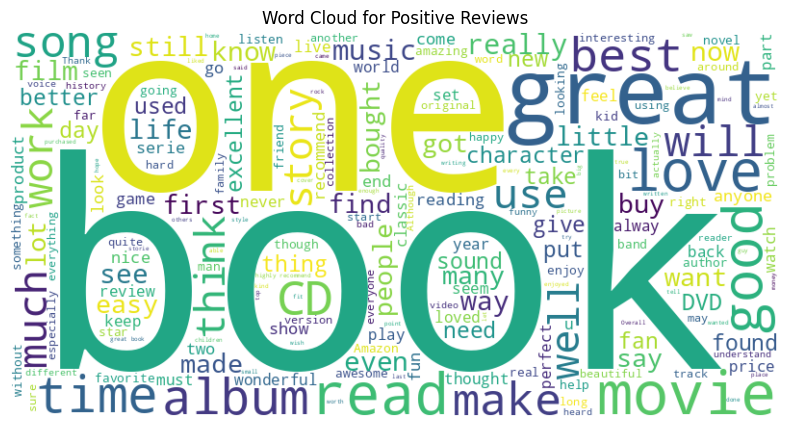

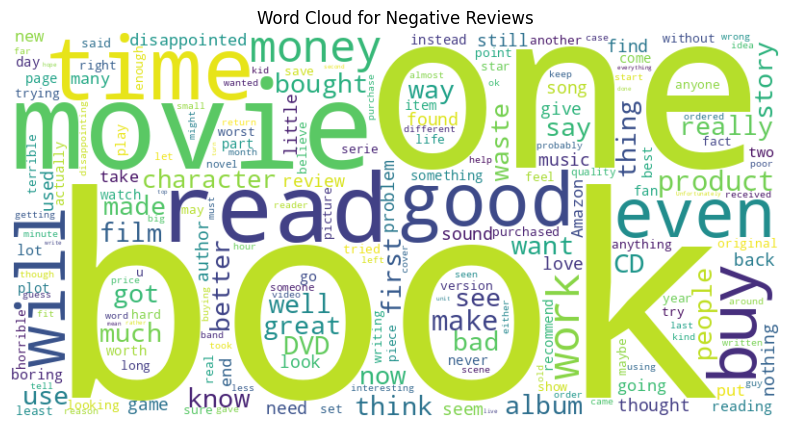

In [17]:
from wordcloud import WordCloud

# WordCloud for positive reviews
positive_reviews = " ".join(df[df['Label'] == 1]['Review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# WordCloud for negative reviews
negative_reviews = " ".join(df[df['Label'] == 0]['Review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


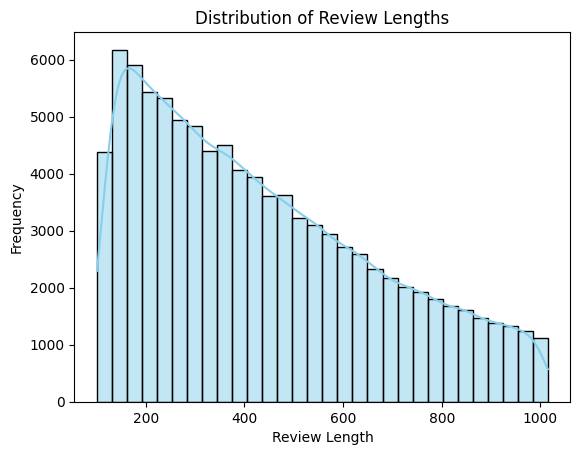

In [18]:
# Add a column for review length
df['Review_Length'] = df['Review'].apply(len)

# Plot review length distribution
sns.histplot(df['Review_Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.head()

,Label,Review,Review_Length
0,1,Great CD: My lovely Pat has one of the GREAT v...,533
1,1,One of the best game music soundtracks - for a...,816
2,0,Batteries died within a year ...: I bought thi...,335
3,1,"works fine, but Maha Energy is better: Check o...",229
4,1,Great for the non-audiophile: Reviewed quite a...,412


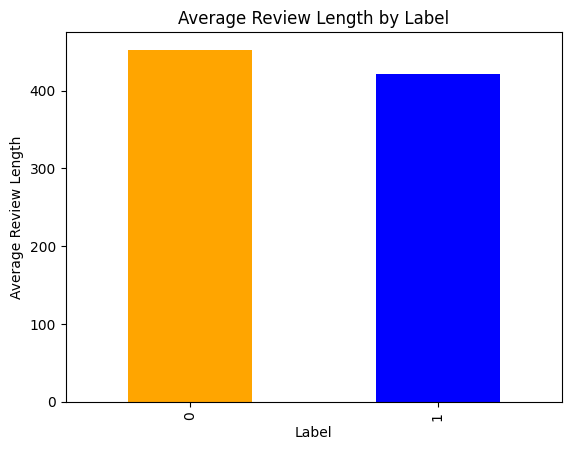

In [20]:
# Group by label and calculate average review length
avg_length = df.groupby('Label')['Review_Length'].mean()

# Bar plot for average review length
avg_length.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Review Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Review Length')
plt.show()


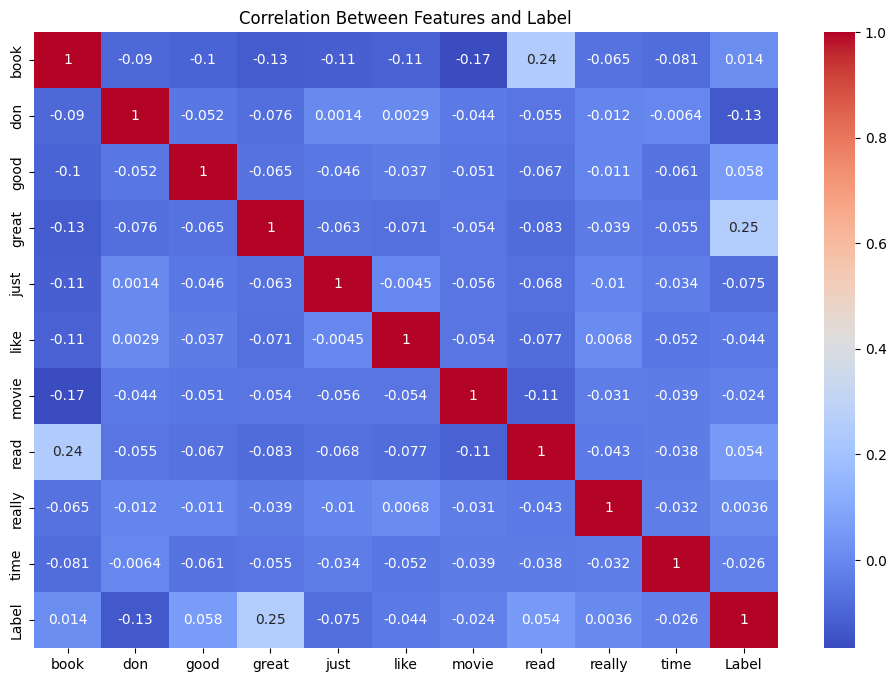

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['Review'])
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_df['Label'] = df['Label']

# Correlation heatmap
correlation = tfidf_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features and Label')
plt.show()


<ipython-input-22-bab6d0ab817b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Negative_Likelihood', y='Word', data=word_freq_df, palette='Reds_d')


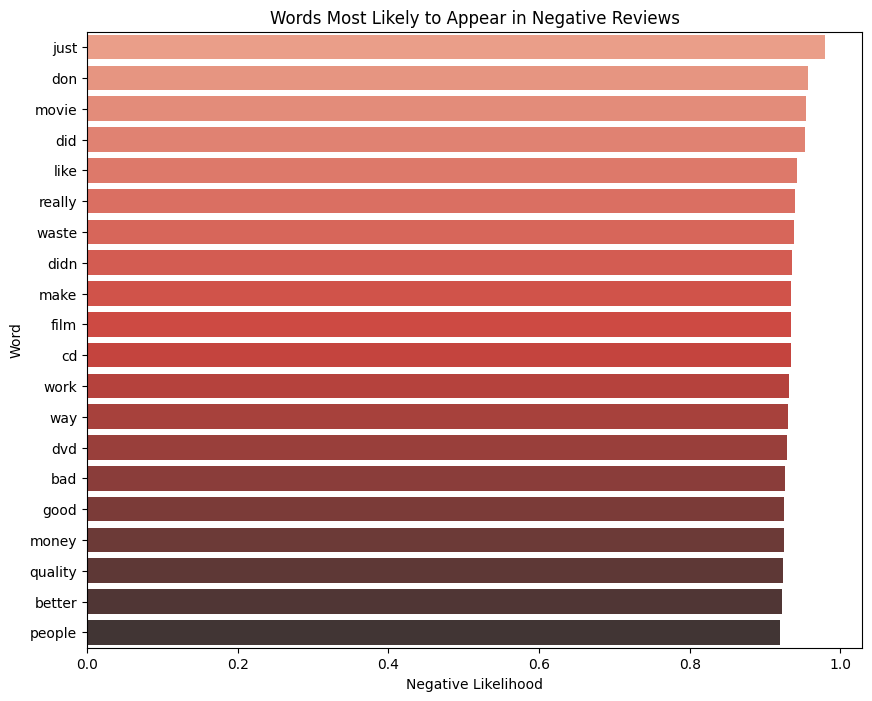

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out empty or null reviews
df = df[df['Review'].notnull() & df['Review'].str.strip().ne('')]

# Separate positive and negative reviews
positive_reviews = df[df['Label'] == 1]['Review']
negative_reviews = df[df['Label'] == 0]['Review']

# Create CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform for both positive and negative reviews
positive_matrix = vectorizer.fit_transform(positive_reviews)
negative_matrix = vectorizer.fit_transform(negative_reviews)

# Calculate word frequencies
positive_word_counts = positive_matrix.toarray().sum(axis=0)
negative_word_counts = negative_matrix.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

# Create a DataFrame to compare word frequencies
word_freq_df = pd.DataFrame({
    'Word': vocab,
    'Positive_Count': positive_word_counts,
    'Negative_Count': negative_word_counts
})

# Calculate the likelihood of words appearing in negative reviews
word_freq_df['Negative_Likelihood'] = word_freq_df['Negative_Count'] / (word_freq_df['Positive_Count'] + word_freq_df['Negative_Count'] + 1e-6)
word_freq_df = word_freq_df.sort_values('Negative_Likelihood', ascending=False).head(20)

# Plot the most likely negative words
plt.figure(figsize=(10, 8))
sns.barplot(x='Negative_Likelihood', y='Word', data=word_freq_df, palette='Reds_d')
plt.title('Words Most Likely to Appear in Negative Reviews')
plt.xlabel('Negative Likelihood')
plt.ylabel('Word')
plt.show()


[('the', 328272), ('and', 197290), ('a', 180030), ('I', 177782), ('to', 177692), ('of', 154642), ('is', 130670), ('this', 103588), ('it', 98483), ('in', 83090), ('for', 74320), ('that', 70055), ('was', 64413), ('with', 51196), ('you', 50394), ('on', 48477), ('not', 48098), ('The', 47954), ('but', 47139), ('have', 46674)]


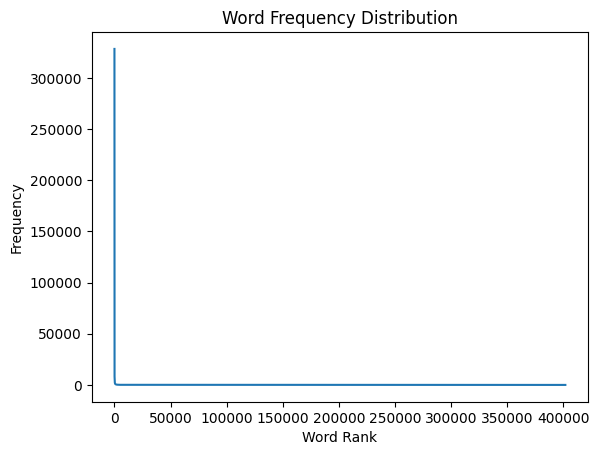

In [23]:
from collections import Counter

# Get all words from your reviews
all_words = ' '.join(df['Review'].values).split()

print
# Count word frequencies
word_counts = Counter(all_words)

# Print the most common words
print(word_counts.most_common(20))

# Plot the word frequency distribution (optional)
import matplotlib.pyplot as plt
plt.plot(sorted(word_counts.values(), reverse=True))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

# Data Cleaning

In [24]:
# !pip install nltk==3.4.5

In [25]:
pip install -U textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1


In [26]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # For multilingual WordNet support
nltk.download('punkt')    # For tokenizing text into words or sentences

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import nltk
from nltk.corpus import stopwords
from textblob import Word

# Ensure you have downloaded the necessary NLTK resources
nltk.download('stopwords')

def cleaning(df, stop_words):
    # Convert to lowercase and split
    df['Review'] = df['Review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

    # Replacing special characters
    df['Review'] = df['Review'].str.replace('[^a-zA-Z\s]', '', regex=True)  # Keep only letters and spaces

    # Replacing digits/numbers
    df['Review'] = df['Review'].str.replace(r'\d+', '', regex=True)  # Remove all digits

    # Removing stop words
    df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization
    df['Review'] = df['Review'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

    return df

# Stop words list
stop_words = stopwords.words('english')

# Apply cleaning function
df = cleaning(df, stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
df.head()

,Label,Review,Review_Length
0,1,great cd lovely pat one great voice generation...,533
1,1,one best game music soundtrack game didnt real...,816
2,0,battery died within year bought charger jul wo...,335
3,1,work fine maha energy better check maha energy...,229
4,1,great nonaudiophile reviewed quite bit combo p...,412


In [30]:
df['Review_Length'] = df['Review'].apply(len)

In [31]:
df.head()

,Label,Review,Review_Length
0,1,great cd lovely pat one great voice generation...,336
1,1,one best game music soundtrack game didnt real...,529
2,0,battery died within year bought charger jul wo...,207
3,1,work fine maha energy better check maha energy...,148
4,1,great nonaudiophile reviewed quite bit combo p...,290


In [32]:
df_temp = df

In [33]:
df = df_temp

In [34]:
!pip install keras


In [35]:
!pip install tensorflow

In [36]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [37]:
# Encoded the target column
lb=LabelEncoder()
df['Label'] = lb.fit_transform(df['Label'])

In [38]:
df['Label']

,Label
0,1
1,1
2,0
3,1
4,1
...,...
95754,0
95755,0
95756,0
95757,1


In [39]:
df['Label'] = df['Label'].astype('int8')

In [40]:
tokenizer = Tokenizer(num_words=10000, split=' ')
tokenizer.fit_on_texts(df['Review'].values)
df["Review"] = df["Review"]
X = tokenizer.texts_to_sequences(df['Review'].values)
X = pad_sequences(X)

In [41]:
# Get the word index (dictionary of words and their indices)
word_index = tokenizer.word_index

# Vocabulary size is the length of the word_index dictionary
vocab_size = len(word_index) + 1
print(vocab_size)

166363


In [42]:
X

array([[   0,    0,    0, ...,    2,   33,  676],
       [   0,    0,    0, ...,  911,  248,   86],
       [   0,    0,    0, ...,   27, 3506,  351],
       ...,
       [   0,    0,    0, ..., 6929,  212, 2628],
       [   0,    0,    0, ...,  804, 3278, 5445],
       [   0,    0,    0, ..., 1474,   76,  273]], dtype=int32)

In [43]:
X.shape

(95759, 103)

In [44]:
max_length = len(X[0])

# Building LSTM model

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.layers import Input

In [47]:
model = Sequential()

# Create an Input layer with the shape of your data
input_shape = (X.shape[1],)  # Shape of your input sequences (e.g., (76,))
inputs = Input(shape=input_shape)

# Add the Embedding layer, using the Input layer as input
embedding_layer = Embedding(input_dim=vocab_size, output_dim=300)(inputs)

# Add the rest of your layers, using the output of the previous layer as input
spatial_dropout_layer = SpatialDropout1D(0.4)(embedding_layer)
lstm_layer = LSTM(176, dropout=0.2, recurrent_dropout=0.2)(spatial_dropout_layer)
output_layer = Dense(2, activation='softmax')(lstm_layer)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=output_layer)

# Compile and print summary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 103)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 103, 300)            │      49,908,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 103, 300)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 176)                 │         335,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,245,062 (191.67 MB)

 Trainable params: 50,245,062 (191.67 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
for layer in model.layers:
    print(layer.get_config())


{'batch_shape': (None, 103), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}
{'name': 'embedding', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 166363, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}
{'rate': 0.4, 'seed': None, 'name': 'spatial_dropout1d', 'dtype': 'float32'}
{'name': 'lstm', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 176, 'activation': 'tanh', 'recurrent_activation':

In [49]:
#Splitting the data into training and testing
y=pd.get_dummies(df['Label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [50]:
X_train.shape, y_train.shape

((67031, 103), (67031, 2))

Epoch 1/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 494s 231ms/step - accuracy: 0.8066 - loss: 0.4212 - val_accuracy: 0.8788 - val_loss: 0.2902
Epoch 2/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 509s 237ms/step - accuracy: 0.9000 - loss: 0.2510 - val_accuracy: 0.8819 - val_loss: 0.2908
Epoch 3/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 481s 230ms/step - accuracy: 0.9207 - loss: 0.2040 - val_accuracy: 0.8867 - val_loss: 0.2869
Epoch 4/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 503s 230ms/step - accuracy: 0.9389 - loss: 0.1619 - val_accuracy: 0.8830 - val_loss: 0.3031
Epoch 5/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 508s 233ms/step - accuracy: 0.9518 - loss: 0.1318 - val_accuracy: 0.8793 - val_loss: 0.3502
Epoch 6/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 491s 234ms/step - accuracy: 0.9618 - loss: 0.1036 - val_accuracy: 0.8769 - val_loss: 0.3786
Epoch 7/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 485s 232ms/step - accuracy: 0.9706 - loss: 0.0814 - val_accuracy: 0.8767 - val_loss: 0.4237
Epoch 8/8
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 504s 233ms/step - accuracy: 

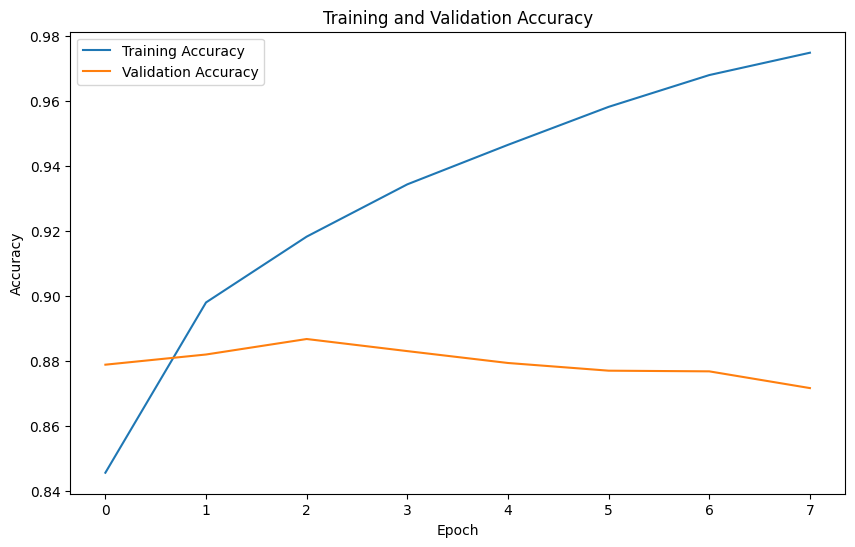

In [51]:
batch_size=32
# Training/Testing Accuracy Curves
history = model.fit(X_train, y_train, epochs=8, batch_size=batch_size,
                    validation_data=(X_test, y_test), verbose='auto')

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
model.evaluate(X_test,y_test)

898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.8706 - loss: 0.5077


[0.4967130422592163, 0.8715887069702148]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step
Test Accuracy: 0.8716


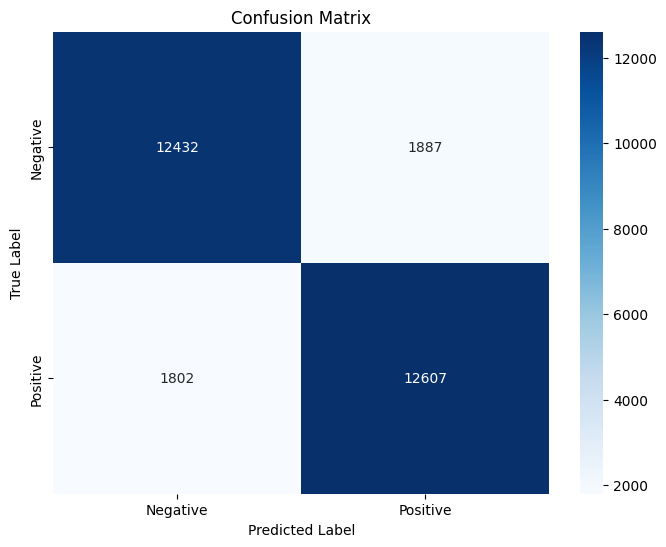

In [54]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_true_classes = np.argmax(y_test.values, axis=1)  # Get true class labels

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
import pickle
with open('my_sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [58]:
import shutil
shutil.copy('/content/my_sentiment_model.pkl', '/content/drive/My Drive/my_sentiment_model.pkl')

'/content/drive/My Drive/my_sentiment_model.pkl'